# **Descriptive Analysis**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# https://drive.google.com/file/d/1xyEdZJpQw5AK4lWbUbC6mD8Wnfxco1FG/view?usp=sharing
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1xyEdZJpQw5AK4lWbUbC6mD8Wnfxco1FG")
df

,id,codigo_curriculo,codigo_ingresso,periodo_ingresso,forma_ingresso,codigo_evasao,forma_evasao,periodo_evasao,evadiu_periodo,forma_saida,...,codigo_tipo_matricula,tipo_matricula,codigo_situacao,situacao,media_final,nome_disciplina,numero_creditos,carga_horaria,nome_setor,periodo_relativo
0,Q386391,1990,1,1979.2,VESTIBULAR,4,CANCELAMENTO POR ABANDONO,1989.1,20.0,Evadido,...,4.0,Dispensa,3.0,Aprovado,NaN,ORGANIZACAO INDUSTRIAL,4.0,60.0,UNID. ACAD. DE ADMINISTRAÇÃO E CONTABILIDADE,5.0
1,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,1.0,Normal,3.0,Aprovado,7.5,ESTÁGIO INTEGRADO,10.0,300.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,9.0
2,K266013,2017,18,2017.2,SISU,0,REGULAR,0.0,NaN,Regular,...,4.0,Dispensa,3.0,Aprovado,6.1,LINGUA PORTUGUESA,4.0,60.0,UNID. ACAD. DE LETRAS,2.0
3,H046905,1999,16,2014.1,VESTIBULAR / ENEM,21,CANCELADO REPROVOU TODAS POR FALTAS,2016.2,6.0,Evadido,...,1.0,Normal,3.0,Aprovado,5.0,CALCULO DIFERENCIAL E INTEGRAL I,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
4,T079917,1990,1,1996.1,VESTIBULAR,1,GRADUADO,1999.2,8.0,Graduado,...,1.0,Normal,3.0,Aprovado,5.6,FÍSICA GERAL III,6.0,90.0,UNID. ACAD. DE FÍSICA,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30125,E191041,1999,16,2013.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,7.0,Graduado,...,1.0,Normal,4.0,Reprovado,2.4,METODOS ESTATISTICOS,4.0,60.0,UNID. ACAD. DE ESTATÍSTICA,3.0
30126,F026548,1999,18,2014.2,SISU,22,CANCELADO 3 REPROV MESMA DISCIPLINA,2016.1,4.0,Evadido,...,1.0,Normal,4.0,Reprovado,3.8,LABORATÓRIO DE PROGRAMAÇÃO I,4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,1.0
30127,P065307,1999,1,2008.2,VESTIBULAR,1,GRADUADO,2014.1,12.0,Graduado,...,1.0,Normal,3.0,Aprovado,9.8,DIREITO E CIDADANIA,4.0,60.0,UNID. ACAD. DE SOCIOLOGIA E ANTROPOLOGIA,6.0
30128,R083868,2017,18,2017.2,SISU,0,REGULAR,0.0,NaN,Regular,...,4.0,Dispensa,3.0,Aprovado,NaN,METODOLOGIA CIENTÍFICA,4.0,60.0,UNID. ACAD. DE SOCIOLOGIA E ANTROPOLOGIA,1.0


## Preprocessing

In [ ]:
# Aplicando os filtros conforme solicitado

# Filtro de período de ingresso
df_filtrado = df[(df['periodo_ingresso'] >= 2006.1) & (df['periodo_ingresso'] <= 2019.2)]

# Removendo tipos de matrícula "Dispensa"
df_filtrado = df_filtrado[df_filtrado['tipo_matricula'] != 'Dispensa']

# Removendo situação "Em Curso"
df_filtrado = df_filtrado[df_filtrado['situacao'] != 'Em Curso']

# Verificando as primeiras linhas do novo DataFrame filtrado
df_filtrado.head()

,id,codigo_curriculo,codigo_ingresso,periodo_ingresso,forma_ingresso,codigo_evasao,forma_evasao,periodo_evasao,evadiu_periodo,forma_saida,...,codigo_tipo_matricula,tipo_matricula,codigo_situacao,situacao,media_final,nome_disciplina,numero_creditos,carga_horaria,nome_setor,periodo_relativo
1,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,1.0,Normal,3.0,Aprovado,7.5,ESTÁGIO INTEGRADO,10.0,300.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,9.0
3,H046905,1999,16,2014.1,VESTIBULAR / ENEM,21,CANCELADO REPROVOU TODAS POR FALTAS,2016.2,6.0,Evadido,...,1.0,Normal,3.0,Aprovado,5.0,CALCULO DIFERENCIAL E INTEGRAL I,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
9,X175376,1999,16,2011.2,VESTIBULAR / ENEM,8,CANCELAMENTO P/ SOLICITACAO ALUNO,2013.2,5.0,Evadido,...,1.0,Normal,5.0,Reprovado por Falta,NaN,MATEMÁTICA DISCRETA,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
12,C332956,1999,1,2009.2,VESTIBULAR,1,GRADUADO,2013.2,9.0,Graduado,...,1.0,Normal,3.0,Aprovado,8.3,ORG.E ARQUITETURA DE COMPUTADORES I,4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,4.0
18,Q283427,1999,1,2010.2,VESTIBULAR,12,CANCELADO NOVO INGRESSO MESMO CURSO,2012.1,4.0,Reingresso,...,1.0,Normal,4.0,Reprovado,1.7,CALCULO DIFERENCIAL E INTEGRAL II,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,3.0


In [ ]:
df_filtrado

,id,codigo_curriculo,codigo_ingresso,periodo_ingresso,forma_ingresso,codigo_evasao,forma_evasao,periodo_evasao,evadiu_periodo,forma_saida,...,codigo_tipo_matricula,tipo_matricula,codigo_situacao,situacao,media_final,nome_disciplina,numero_creditos,carga_horaria,nome_setor,periodo_relativo
1,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,1.0,Normal,3.0,Aprovado,7.5,ESTÁGIO INTEGRADO,10.0,300.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,9.0
3,H046905,1999,16,2014.1,VESTIBULAR / ENEM,21,CANCELADO REPROVOU TODAS POR FALTAS,2016.2,6.0,Evadido,...,1.0,Normal,3.0,Aprovado,5.0,CALCULO DIFERENCIAL E INTEGRAL I,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
9,X175376,1999,16,2011.2,VESTIBULAR / ENEM,8,CANCELAMENTO P/ SOLICITACAO ALUNO,2013.2,5.0,Evadido,...,1.0,Normal,5.0,Reprovado por Falta,NaN,MATEMÁTICA DISCRETA,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
12,C332956,1999,1,2009.2,VESTIBULAR,1,GRADUADO,2013.2,9.0,Graduado,...,1.0,Normal,3.0,Aprovado,8.3,ORG.E ARQUITETURA DE COMPUTADORES I,4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,4.0
18,Q283427,1999,1,2010.2,VESTIBULAR,12,CANCELADO NOVO INGRESSO MESMO CURSO,2012.1,4.0,Reingresso,...,1.0,Normal,4.0,Reprovado,1.7,CALCULO DIFERENCIAL E INTEGRAL II,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30121,I212832,1999,1,2008.2,VESTIBULAR,1,GRADUADO,2012.2,9.0,Graduado,...,1.0,Normal,3.0,Aprovado,7.0,COMPILADORES,4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,8.0
30122,H091235,1999,1,2009.2,VESTIBULAR,21,CANCELADO REPROVOU TODAS POR FALTAS,2011.1,4.0,Evadido,...,1.0,Normal,5.0,Reprovado por Falta,0.0,ECONOMIA,4.0,60.0,UNID. ACAD. DE ECONOMIA E FINANCAS,3.0
30125,E191041,1999,16,2013.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,7.0,Graduado,...,1.0,Normal,4.0,Reprovado,2.4,METODOS ESTATISTICOS,4.0,60.0,UNID. ACAD. DE ESTATÍSTICA,3.0
30126,F026548,1999,18,2014.2,SISU,22,CANCELADO 3 REPROV MESMA DISCIPLINA,2016.1,4.0,Evadido,...,1.0,Normal,4.0,Reprovado,3.8,LABORATÓRIO DE PROGRAMAÇÃO I,4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,1.0


## Basic

### 1. What is the number of students by type of admission?

In [ ]:
# Calculando a quantidade de alunos por tipo de ingresso
alunos_por_tipo_ingresso = df_filtrado['forma_ingresso'].value_counts()
alunos_por_tipo_ingresso

forma_ingresso
SISU                 5024
VESTIBULAR / ENEM    4412
VESTIBULAR           3831
TRANSFERENCIA         249
REOPCAO               168
JUDICIAL              125
CONVENIO PEC-G         10
GRADUADO                7
REINGRESSO              5
Name: count, dtype: int64

### 2. What is the average credit hours taken in the first semester?

In [ ]:
# Calculando a carga horária média cursada no primeiro período
media_carga_horaria_primeiro_periodo = df_filtrado[df_filtrado['periodo_relativo'] == 1]['carga_horaria'].mean()
media_carga_horaria_primeiro_periodo

59.44698033707865

### 3. What are the maximum and minimum ages of dropout?

In [ ]:
# Calculando a idade máxima e mínima de evasão
max_idade_evasao = df_filtrado['idade_evasao'].max()
min_idade_evasao = df_filtrado['idade_evasao'].min()

max_idade_evasao, min_idade_evasao

(48.0, 17.0)

## Moderate

### 1. What is the proportion of dropouts by year of admission?

In [ ]:
# Analisando os valores únicos na coluna 'forma_saida'
df_filtrado['forma_saida'].unique()

array(['Graduado', 'Evadido', 'Reingresso', 'Regular', 'Outros'],
      dtype=object)

In [ ]:
# Extraindo o ano de ingresso e criando uma nova coluna 'ano_ingresso'
df_filtrado['ano_ingresso'] = df_filtrado['periodo_ingresso'].apply(lambda x: int(x))

# Agrupando por ano de ingresso para calcular a proporção de evadidos
evadidos_por_ano = df_filtrado.groupby('ano_ingresso')['forma_saida'].apply(lambda x: (x == 'Evadido').sum() / len(x))

evadidos_por_ano

ano_ingresso
2006    0.090909
2007    0.207516
2008    0.152338
2009    0.263393
2010    0.258389
2011    0.372697
2012    0.346999
2013    0.371495
2014    0.262053
2015    0.209918
2016    0.227171
2017    0.193119
2018    0.110132
2019    0.052632
Name: forma_saida, dtype: float64

### 2. What is the distribution of grades by enrollment period?

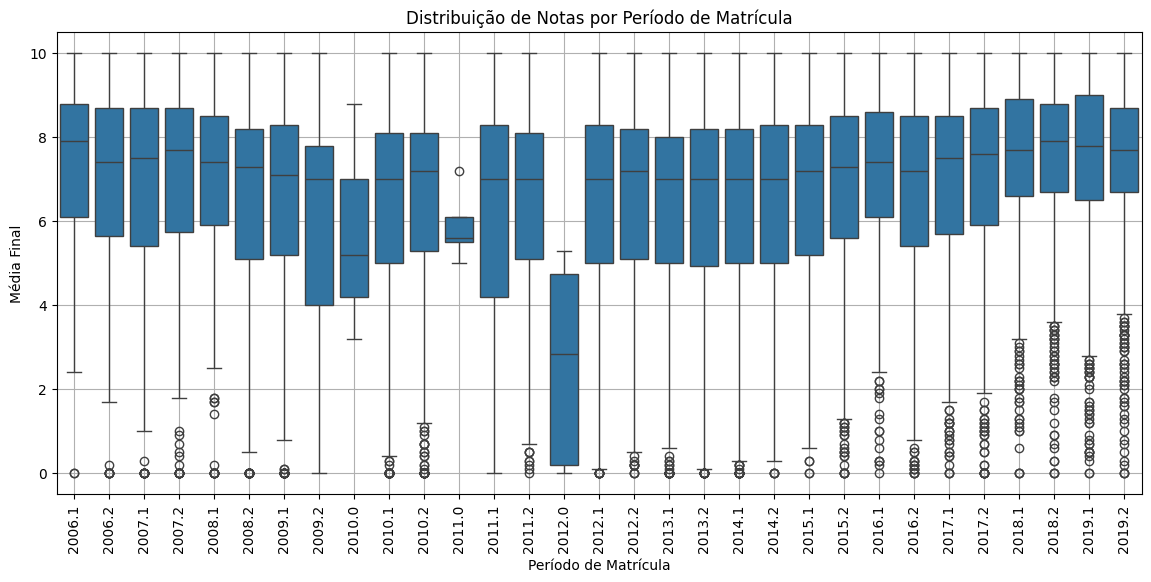

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Removendo possíveis NaNs em media_final para a visualização
df_notas = df_filtrado.dropna(subset=['media_final'])

# Criando um gráfico de pontos para visualizar a distribuição de notas por período de matrícula
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_notas, x='periodo_matricula', y='media_final')
plt.title('Distribuição de Notas por Período de Matrícula')
plt.xlabel('Período de Matrícula')
plt.ylabel('Média Final')
plt.xticks(rotation=90)  # Rotacionando as labels para melhor visualização
plt.grid(True)
plt.show()

### 3.  Consider that the overall average of a student is defined as the average of all nonnull grades in the courses the student has taken. Who is the student with the fewest semesters attended and the highest overall average who dropped out as a graduate?


In [ ]:
# Filtrar alunos evadidos como Graduados
graduados = df_filtrado[df_filtrado['forma_evasao'] == 'GRADUADO']

# Calcular a média geral para cada aluno, usando apenas notas não nulas
graduados_notas = graduados.dropna(subset=['media_final'])  # Removendo registros sem notas
media_geral = graduados_notas.groupby('id')['media_final'].mean().reset_index()

# Calcular a quantidade de períodos cursados por cada aluno
# Assumimos que o período relativo indica o número de períodos cursados
periodos_cursados = graduados.groupby('id')['periodo_relativo'].max().reset_index()

# Combinar as informações de média geral e períodos cursados
resultados = pd.merge(media_geral, periodos_cursados, on='id')

# Encontrar o aluno com a menor quantidade de períodos cursados e a maior média geral
# Ordenando primeiro por períodos cursados ascendente, depois por média geral descendente
melhor_candidato = resultados.sort_values(by=['periodo_relativo', 'media_final'], ascending=[True, False]).head(1)
melhor_candidato

,id,media_final,periodo_relativo
135,F374978,8.3,1.0


## Challenging

### 1.  Consider that the overall average of a student is defined as the average of all nonnull grades in the courses the student has taken. Also, consider that there are two semesters each year, the first semester of the year is characterized by ending with “.1” and the second semester of the year ends with “.2”, for example, in the year 2015 there are the periods 2015.1 and 2015.2. Based on these definitions, what is the correlation between the overall average of the students and enrolling in each semester of the year (first and second)?

In [ ]:
# Criar uma coluna para a média geral do aluno
# Calculamos a média dos valores não-nulos de 'media_final' para cada 'id'
media_geral_por_aluno = df_filtrado.groupby('id')['media_final'].mean().reset_index()

# Agora vamos adicionar essa média geral ao dataframe df_filtrado
df_filtrado = df_filtrado.merge(media_geral_por_aluno, on='id', suffixes=('', '_geral'))

# Exibir as primeiras linhas para confirmar a adição da média geral
df_filtrado.head()

,id,codigo_curriculo,codigo_ingresso,periodo_ingresso,forma_ingresso,codigo_evasao,forma_evasao,periodo_evasao,evadiu_periodo,forma_saida,...,codigo_situacao,situacao,media_final,nome_disciplina,numero_creditos,carga_horaria,nome_setor,periodo_relativo,ano_ingresso,media_final_geral
0,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,3.0,Aprovado,7.5,ESTÁGIO INTEGRADO,10.0,300.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,9.0,2011,6.84
1,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,4.0,Reprovado,1.3,TECC (ANÁLISE DE DADOS II),4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,8.0,2011,6.84
2,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,3.0,Aprovado,6.5,ALGEBRA VETORIAL E GEOMETRIA ANALÍTICA,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,1.0,2011,6.84
3,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,3.0,Aprovado,10.0,DIREITO E CIDADANIA,4.0,60.0,UNID. ACAD. DE SOCIOLOGIA E ANTROPOLOGIA,4.0,2011,6.84
4,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,3.0,Aprovado,7.2,TEORIA DOS GRAFOS,2.0,30.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,2.0,2011,6.84


In [ ]:
# Criar uma coluna binária para indicar se o ingresso foi no primeiro (0) ou no segundo (1) período do ano
df_filtrado['ingresso_periodo_binario'] = (df_filtrado['periodo_ingresso'] % 1 >= 0.2).astype(int)

# Calcular a correlação entre a média geral e o período binário de ingresso
correlacao = df_filtrado[['media_final_geral', 'ingresso_periodo_binario']].corr().iloc[0, 1]
correlacao

-0.17686522806793598

### 2. How has the entropy of the distribution of students by academic sector changed over the last 5 recorded semesters?

In [ ]:
from scipy.stats import entropy

# Identificando os últimos 5 períodos únicos no DataFrame filtrado
last_5_periods = df_filtrado['periodo_matricula'].dropna().unique()
last_5_periods.sort()
last_5_periods = last_5_periods[-5:]

# Calculando a distribuição de alunos por setor acadêmico para cada um dos últimos 5 períodos
entropies = {}
for period in last_5_periods:
    # Filtrando o dataframe pelo período
    df_period = df_filtrado[df_filtrado['periodo_matricula'] == period]

    # Contando o número de alunos por setor acadêmico
    counts = df_period['nome_setor'].value_counts()

    # Convertendo contagens para proporções
    probabilities = counts / counts.sum()

    # Calculando a entropia
    entropies[period] = entropy(probabilities)

entropies

{2018.2: 0.7477319429323736,
 2019.0: 0.0,
 2019.1: 0.7448285034159151,
 2019.2: 0.683440891278217,
 2020.1: 0.0}

### 3. Consider that the overall average of a student is defined as the average of all nonnull grades in the courses the student has taken. What is the degree of skewness in the distribution of students’ overall averages, and how does it affect the overall academic performance?

In [ ]:
# Calcular a média geral dos alunos, excluindo notas nulas
media_geral_alunos = df_filtrado.groupby('id')['media_final'].mean().dropna()

# Calcular a assimetria (skewness) da distribuição das médias gerais
skewness_media_geral = media_geral_alunos.skew()

media_geral_alunos.describe(), skewness_media_geral

(count    2169.000000
 mean        6.127186
 std         2.188754
 min         0.000000
 25%         4.950000
 50%         6.600000
 75%         7.750000
 max         9.900000
 Name: media_final, dtype: float64,
 -0.8975282204956747)